# Car Logo Classifier Model
### github - https://github.com/gautam132002/car-logo-classifier

- by - Gautam Negi
- credit@dataset - https://www.kaggle.com/code/binhminhs10/vehicle-logo-recog-10-class

In [1]:
# importing dependencies

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2023-12-02 18:57:13.079528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 18:57:13.163884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 18:57:13.165113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 18:57:14.748134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# defining path to train and test dataset
train_data_dir = 'dataset_logos/Train'
test_data_dir = 'dataset_logos/Test'

# setting image dimensions
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)

In [3]:
# data preprocessing and augmentation.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
batch_size = 32

#creating a generator for training data.

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

#Creating a generator for test data.
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


# Neural Network Architecture

## input Layer
Input

## Convolutional Layer 1
-> Conv2D(32) - ReLU: Convolutional layer with 32 filters of size (3, 3) and ReLU activation.

## MaxPooling Layer 1
-> MaxPooling2D(2x2): Max pooling layer with a pool size of (2, 2).

## Convolutional Layer 2
-> Conv2D(64) - ReLU: Convolutional layer with 64 filters of size (3, 3) and ReLU activation.

## MaxPooling Layer 2
-> MaxPooling2D(2x2): Max pooling layer with a pool size of (2, 2).

## Convolutional Layer 3
-> Conv2D(128) - ReLU: Convolutional layer with 128 filters of size (3, 3) and ReLU activation.

## MaxPooling Layer 3
-> MaxPooling2D(2x2): Max pooling layer with a pool size of (2, 2).

## Flatten Layer
-> Flatten: Reshapes the data before fully connected layers.

## Dense Layer 1
-> Dense(256) - ReLU: Fully connected layer with 256 neurons and ReLU activation.

## Dropout Layer
-? Dropout(0.5): Dropout layer with a dropout rate of 0.5 to prevent overfitting.

## Dense Layer 2 (Output Layer)
-> Dense(10) - Softmax: Fully connected layer with 10 neurons and softmax activation for classification.

## Output Layer
Output


In [5]:
# definng model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [6]:
# compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
epochs = 10

# train the model and storing traning history in variable : "history"  
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/10
312/312 [==============================] - 317s 1s/step - loss: 1.2007 - accuracy: 0.5873
Epoch 2/10
312/312 [==============================] - 284s 910ms/step - loss: 0.3275 - accuracy: 0.8974
Epoch 3/10
312/312 [==============================] - 276s 885ms/step - loss: 0.1827 - accuracy: 0.9408
Epoch 4/10
312/312 [==============================] - 264s 845ms/step - loss: 0.1281 - accuracy: 0.9585
Epoch 5/10
312/312 [==============================] - 276s 883ms/step - loss: 0.0934 - accuracy: 0.9699
Epoch 6/10
312/312 [==============================] - 268s 858ms/step - loss: 0.0766 - accuracy: 0.9747
Epoch 7/10
312/312 [==============================] - 266s 852ms/step - loss: 0.0689 - accuracy: 0.9777
Epoch 8/10
312/312 [==============================] - 264s 847ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 9/10
312/312 [==============================] - 265s 850ms/step - loss: 0.0603 - accuracy: 0.9821
Epoch 10/10
312/312 [==============================] - 265s 847ms/s

In [8]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // batch_size
)

print(f'Test accuracy: {test_acc}')


46/46 [==============================] - 10s 213ms/step - loss: 0.0238 - accuracy: 0.9946
Test accuracy: 0.9945651888847351


# Plotting perfomance 

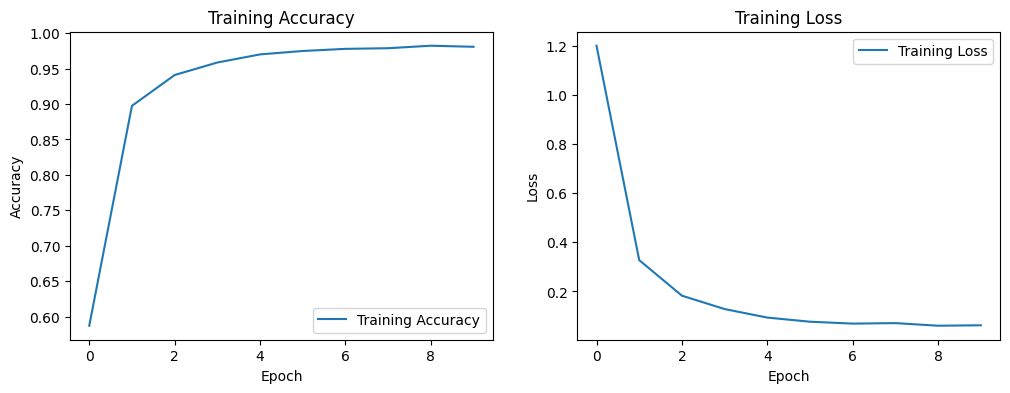

In [9]:
# plotting perfomance using taning history

def plot_history(history):
    
    # accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


plot_history(history)

In [10]:
# saving model.
model.save('car_logo_classifier_model.h5')

/home/guatam/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enter the path of the image:  0030.jpg


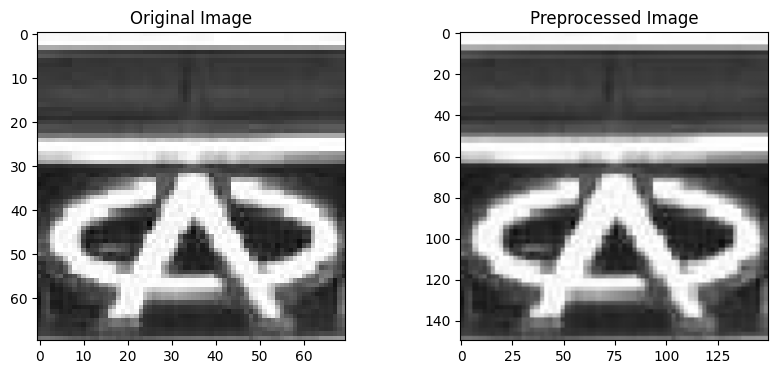

1/1 [==============================] - 0s 110ms/step
PREDICTION => : Chery


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


loaded_model = tf.keras.models.load_model('car_logo_classifier_model.h5')


def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array


image_path = input("Enter the path of the image: ")


processed_image = preprocess_image(image_path)

plt.figure(figsize=(10, 4))

# original Image
plt.subplot(1, 2, 1)
img = image.load_img(image_path)
plt.imshow(img)
plt.title('Original Image')

# preprocessed Image
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(processed_image))
plt.title('Preprocessed Image')

plt.show()

# make predictions
predictions = loaded_model.predict(processed_image)
# print(predictions[0])

# get the predicted class
predicted_class = np.argmax(predictions)

# class_labels = list(train_generator.class_indices.keys())
# print(class_labels)

class_labels = ['Buick', 'Chery', 'Citroen', 'Honda', 'Hyundai', 'Lexus', 'Mazda', 'Peugeot', 'Toyota', 'VW']

print(f"PREDICTION => : {class_labels[predicted_class]}")
